In [3]:
"""
-----------------------------------------------------------------------------
MNIST digit data reading helper
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor


In [4]:
import os

# Assuming you have uploaded files directly to Colab
folder_path = '/content'

# List all files in the folder
file_list = os.listdir(folder_path)

# Print the file paths
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    print(file_path)


/content/.config
/content/.ipynb_checkpoints
/content/ML_Assignment
/content/sample_data


# Read MNIST data:
There are many [ways](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


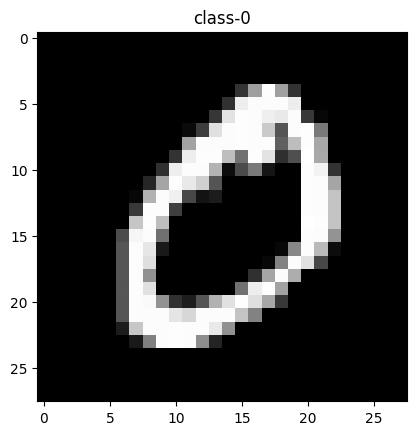

Train image 1-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  

In [13]:
def read_images(filename):
    """Read MNIST images"""

    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))

    return images

def read_labels(filename):
    """Read MNIST labels"""

    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)

    return labels


dataset_path = '/content/ML_Assignment/'# Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

# rand_ids = np.random.choice(train_images.shape[0])
rand_ids=1
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



# Extract 20% data from thhe training data as a validation set. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [6]:
# Your validation set extraction script/code

train_data_len=int(train_images.shape[0]*0.8)

validation_images=train_images[train_data_len: train_images.shape[0],: ,: ]
validation_labels=train_labels[train_data_len: train_images.shape[0]]
print('Validation data (X) size: {}, and labels (Y) size: {}' .format(validation_images.shape, validation_labels.shape))

train_images=train_images[:train_data_len,: ,: ]
train_labels=train_labels[:train_data_len]
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

# ---------------------------------------------------------------
# train data (48000) | validation set (12000) | test set (10000)|
# ---------------------------------------------------------------

Validation data (X) size: (12000, 28, 28), and labels (Y) size: (12000,)
Train data (X) size: (48000, 28, 28), and labels (Y) size: (48000,)


# Implement k-NN classification rule/algorithm, we have discussed in our class. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [7]:
# Your k-NN algorithm script/code


train_data=train_images.reshape((train_images.shape[0],-1))
print(train_data.shape)

validation_data=validation_images.reshape((validation_images.shape[0],-1))
print(validation_data.shape)



(48000, 784)
(12000, 784)


In [66]:
def euclidean_distance_batch(batch1, batch2):
    return np.sqrt(np.sum((batch1[:, np.newaxis, :] - batch2) ** 2, axis=-1))

def knn_classify_batch(train_data, train_labels, test_batch, k):

    distances = euclidean_distance_batch(train_data, test_batch)

    sorted_indices = np.argsort(distances, axis=0)
    k_nearest_labels = train_labels[sorted_indices[:k, :]]
    unique_labels, counts = np.unique(k_nearest_labels, axis=0, return_counts=True)
    predicted_labels = unique_labels[np.argmax(counts, axis=0)]
    return predicted_labels

def calculate_accuracy(predictions, true_labels):
    if true_labels.ndim == 1:  # Handle 1D array
        true_labels = true_labels.reshape(1, -1)

    correct_predictions = np.sum(np.all(predictions == true_labels, axis=0))
    total_predictions = true_labels.shape[1]
    accuracy = correct_predictions / total_predictions
    return accuracy

# Assuming you have training data, training labels, and validation sets
# train_data, train_labels, val_set1, val_labels1, val_set2, val_labels2, ... (and so on)

# Choose a value for k
k_value = 7

# Batch size for processing
batch_size = 1000  # You can adjust this based on your available memory

# For each validation set, make predictions and calculate accuracy
val_sets = validation_data.reshape(120,100,784)  # Add more validation sets if needed
val_labels = validation_labels.reshape(120,100)  # Corresponding labels for validation sets

acc=[]

for i, val_set in enumerate(val_sets):
    num_batches = len(val_set) // batch_size

    predictions_batches = []
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = (batch_idx + 1) * batch_size

        val_batch = val_set[start_idx:end_idx]
        predictions_batch = knn_classify_batch(train_data, train_labels, val_batch, k_value)
        predictions_batches.append(predictions_batch)

    # Process the last batch, even if its size is smaller than batch_size
    if len(val_set) % batch_size != 0:
        last_batch = val_set[num_batches * batch_size:]
        predictions_last_batch = knn_classify_batch(train_data, train_labels, last_batch, k_value)
        predictions_batches.append(predictions_last_batch)

    # Concatenate predictions for all batches along axis 0
    predictions = np.concatenate(predictions_batches, axis=0)

    accuracy = calculate_accuracy(predictions, val_labels[i])
    acc.append(accuracy)
    print(f'Accuracy on validation set {i + 1}: {accuracy:.4f}')
print(f'Average Accuracy on validation set : {np.sum(acc)/len(acc):.4f}')


Accuracy on validation set 1: 0.2300
Accuracy on validation set 2: 0.2300
Accuracy on validation set 3: 0.3100
Accuracy on validation set 4: 0.2700
Accuracy on validation set 5: 0.3300
Accuracy on validation set 6: 0.2800
Accuracy on validation set 7: 0.2200
Accuracy on validation set 8: 0.2900
Accuracy on validation set 9: 0.2200
Accuracy on validation set 10: 0.2500
Accuracy on validation set 11: 0.2200
Accuracy on validation set 12: 0.3600
Accuracy on validation set 13: 0.2700
Accuracy on validation set 14: 0.3600
Accuracy on validation set 15: 0.2700
Accuracy on validation set 16: 0.1700
Accuracy on validation set 17: 0.2100
Accuracy on validation set 18: 0.1900
Accuracy on validation set 19: 0.2600
Accuracy on validation set 20: 0.1600
Accuracy on validation set 21: 0.2800
Accuracy on validation set 22: 0.1700
Accuracy on validation set 23: 0.3000
Accuracy on validation set 24: 0.2300
Accuracy on validation set 25: 0.2400
Accuracy on validation set 26: 0.1800
Accuracy on validatio

[7]


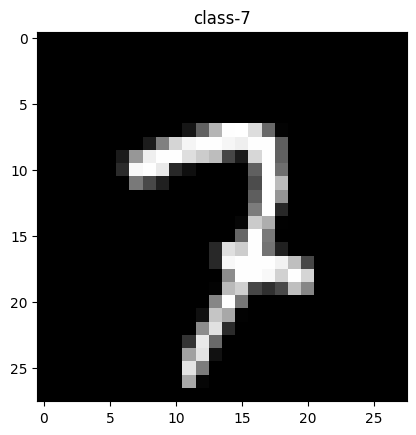

In [84]:
# PREDICTIONS

no=41
print(knn_classify_batch(train_data, train_labels, test_images[no,:,:].reshape(28*28), 5))
# validation_data[1,:]
# validation_labels[1]
plt.imshow(test_images[no,:,:].reshape(28,28), cmap='gray')
plt.title('class-'+str(test_labels[no]))
plt.show()